# **Feature Selection-Information gain - mutual information In Classification**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('ggplot')
# sns.set_theme(style='whitegrid')
%matplotlib inline

### **Mutual Information**

MI Estimate mutual information for a discrete target variable.

**Mutual information** (MI) between two random variables is a **non-negative** value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from `k-nearest` neighbors distances.

**Inshort**

>A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables `X` and `Y` can be stated formally as follows:

$$I(X ; Y) = H(X) - H(X | Y)$$


Where $I(X ; Y)$ is the mutual information for $X$ and $Y$, $H(X)$ is the entropy for $X$ and $H(X | Y)$ is the conditional entropy for $X$ given $Y$. The result has the units of bits.

**Mutual Information** is another metric used in feature selection to measure **the amount of information shared between a feature and the target variable in a dataset**.

In feature selection, **we aim to select features that have a high mutual information score**, as they provide significant information for classifying instances.

Calculate the mutual information between each feature and the target variable in the dataset.

The mutual information measures the amount of shared information or dependency between the feature and the target variable. Higher mutual information indicates a stronger relationship between the feature and the target.




### **Information Gain**

**Information gain** is a metric used in feature selection to measure the amount of useful information a feature provides for classifying instances in a dataset. It quantifies the reduction in entropy achieved by splitting the data based on a particular feature.

In feature selection, we aim to select features that maximize information gain, as they contribute the most to improving the classification accuracy. Features with higher information gain have a stronger ability to discriminate between different classes or categories.

Here's an explanation of information gain with respect to feature selection, along with a code example in Python:

- Calculate the entropy of the target variable (class labels) before splitting the data.

- For each feature, calculate the entropy of the target variable after splitting the data based on that feature.

- Calculate the information gain by subtracting the weighted average of the entropies after splitting from the entropy before splitting.

- Select the feature with the highest information gain as the most informative one.

Here's an example code snippet that demonstrates the calculation of information gain for feature selection using the scikit-learn library:

In [38]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris

# Load the Iris dataset as an example
data = load_iris()
X = data.data       # Features
y = data.target     # Target variable

# Calculate the information gain using mutual information
info_gain = mutual_info_classif(X, y)

# Create a dictionary with feature names and their corresponding information gains
feature_info_gain = {}
for i, feature_name in enumerate(data.feature_names):
    feature_info_gain[feature_name] = info_gain[i]

# Sort the features based on their information gains in descending order
sorted_features = sorted(feature_info_gain.items(), key=lambda x: x[1], reverse=True)

# Print the features along with their information gains
for feature, gain in sorted_features:
    print(f"{feature}: {gain}")

petal width (cm): 0.997602756756367
petal length (cm): 0.9885691693728809
sepal length (cm): 0.5222825490264884
sepal width (cm): 0.24673965190984148


### **Entropy**




Entropy is a measure of impurity or disorder in a set of data. In the context of feature selection, entropy is used to quantify the amount of information provided by a feature in distinguishing different classes or categories within the dataset.

When performing feature selection, we want to identify features that have the highest discriminatory power. In other words, we aim to select features that provide the most information in differentiating between different classes or categories.

The entropy of a feature can be calculated using the formula:
$$Entropy = -∑(p * log_{2}(p))$$



Here's an example of calculating the entropy for a feature in Python:


[`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [39]:
a = np.array(['a', 'b', 'b', 'c', 'a'])

_, indices = np.unique(a, return_index=True)
print(_, indices)

['a' 'b' 'c'] [0 1 3]


In [40]:
b = np.array([1, 2, 6, 4, 2, 3, 2])

_, indices = np.unique(b, return_index=True)
print(_, indices)

[1 2 3 4 6] [0 1 5 3 2]


In [41]:
import numpy as np

def calculate_entropy(feature):
    _, counts = np.unique(feature, return_counts=True)
    print(_, counts)
    total_count = np.sum(counts)
    print(total_count)
    probabilities = counts / total_count
    print(probabilities)
    entropy = - np.sum(probabilities * np.log10(probabilities))
    return entropy

# Example feature data
# feature_data = [0, 0, 1, 1, 0, 1, 1, 0, 1, 1]
# feature_data = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Modified to have mostly one unique value
feature_data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Repeated pattern

# Calculate entropy
entropy = calculate_entropy(feature_data)

print("Entropy:", entropy)

[0 1 2 3 4 5 6 7 8 9] [2 2 2 2 2 2 2 2 2 2]
20
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Entropy: 1.0


Entropy measures the amount of disorder or randomness within a feature. A feature with entropy close to `0` indicates high purity and strong discriminatory power, **meaning it provides valuable information for classification**.

 On the other hand, an entropy value close to `1` suggests low purity and weak discriminatory power, indicating the **feature doesn't contribute much useful information for classification**.

 The goal of feature selection is to choose features with low entropy (`close to 0`) as they are more informative and helpful for classification tasks.

### **Gini Impurity**

Gini impurity is another metric used in feature selection to measure the impurity or disorder within a feature. It quantifies the probability of misclassifying a randomly chosen element in a dataset.

In feature selection, we aim to select features that minimize Gini impurity, as they provide better discriminatory power for classification tasks.

Here's an explanation of Gini impurity with respect to feature selection, along with a code example in Python:

- Calculate the Gini impurity of the target variable (class labels) before splitting the data.

- For each feature, calculate the Gini impurity of the target variable after splitting the data based on that feature.

- Calculate the Gini impurity reduction by subtracting the weighted average of the Gini impurities after splitting from the Gini impurity before splitting.

- Select the feature with the highest Gini impurity reduction as the most informative one.

Here's an example code snippet that demonstrates the calculation of Gini impurity for feature selection using the scikit-learn library:

In [42]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import load_iris

# Load the Iris dataset as an example
data = load_iris()
X = data.data  # Features
y = data.target  # Target variable

# Calculate the Gini impurity using the f_classif function
gini_impurity = 1 - f_classif(X, y)[1]  # Gini impurity is calculated as (1 - p-value)

# Create a dictionary with feature names and their corresponding Gini impurities
feature_gini_impurity = {}
for i, feature_name in enumerate(data.feature_names):
    feature_gini_impurity[feature_name] = gini_impurity[i]

# Sort the features based on their Gini impurities in descending order
sorted_features = sorted(feature_gini_impurity.items(), key=lambda x: x[1], reverse=True)

# Print the features along with their Gini impurities
for feature, impurity in sorted_features:
    print(f"{feature}: {impurity}")

sepal length (cm): 1.0
sepal width (cm): 1.0
petal length (cm): 1.0
petal width (cm): 1.0


`f_classif` function from scikit-learn to calculate the `Gini impurity` for each feature in the Iris dataset. We subtract the p-value (obtained from the `f_classif` test) from 1 to obtain the Gini impurity.

# **Feature Selection on Wine Dataset**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('ggplot')
# sns.set_theme(style='whitegrid')
%matplotlib inline

In [44]:
wine_url = "https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv"

df = pd.read_csv(wine_url)
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [45]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [47]:
# dependent and independent varible
X = df.drop(labels=['Wine'], axis=1)
y = df['Wine']

# Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290


In [49]:
from sklearn.feature_selection import mutual_info_classif

# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.42209388, 0.30199732, 0.13342096, 0.2504555 , 0.23106582,
       0.39166296, 0.70389442, 0.10496708, 0.35220384, 0.53303506,
       0.59584626, 0.5129112 , 0.55911883])

In [50]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.703894
Hue                     0.595846
Proline                 0.559119
Color.int               0.533035
OD                      0.512911
Alcohol                 0.422094
Phenols                 0.391663
Proanth                 0.352204
Malic.acid              0.301997
Acl                     0.250455
Mg                      0.231066
Ash                     0.133421
Nonflavanoid.phenols    0.104967
dtype: float64

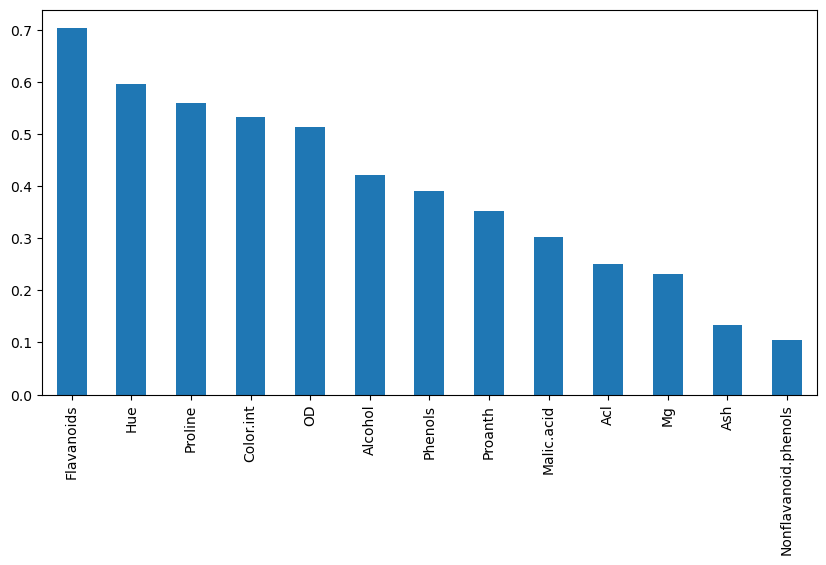

In [51]:
# the ordered mutual_info values per feature
mutual_info_per_feat  = mutual_info.sort_values(ascending=False)

# plot
mutual_info_per_feat.plot.bar(figsize=(10, 5))
plt.show()

In [52]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

# **Feature Selection on Housing Price Dataset**

In [53]:
import pandas as pd

housing_df = pd.read_csv("_dataset\housing_data.csv")
housing_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

taking only the integer and float datatypes

In [55]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [56]:
num_lst = ["int16", "int32", "int64", "float16", "float32", "float64"]
num_cols = list(housing_df.select_dtypes(include=num_lst).columns)
housing_df = housing_df[num_cols]
housing_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [57]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [58]:
# droping the id column
housing_df = housing_df.drop('Id', axis=1)
housing_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


Regression models are commonly used in scenarios where the prediction target is a continuous value, such as predicting housing prices, stock market prices, or in this case, the sales price of a product.

 so this is a regression problem since the output feature is `SalesPrice`

In [59]:
from sklearn.model_selection import train_test_split

# Performing the train_train_split to avoid the overfitting
X = housing_df.drop(labels=['SalePrice'], axis=1)
y = housing_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [60]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      190
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         3
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [61]:
from sklearn.feature_selection import mutual_info_regression

# Fill missing values with the mean
X_train_filled = X_train.fillna(X_train.mean())

# Determine the mutual information
mutual_info = mutual_info_regression(X_train_filled, y_train)
mutual_info


array([0.2934591 , 0.18239285, 0.15105172, 0.51631485, 0.11956942,
       0.32076042, 0.25863827, 0.06778504, 0.1418883 , 0.00393936,
       0.14788849, 0.31762327, 0.28615427, 0.22390656, 0.        ,
       0.44956844, 0.02981022, 0.00460351, 0.23519992, 0.06710687,
       0.06010855, 0.02421239, 0.15858818, 0.15715741, 0.27024687,
       0.3526699 , 0.34115415, 0.07428471, 0.15255113, 0.02432835,
       0.00108816, 0.03050771, 0.00087326, 0.        , 0.00069838,
       0.01610028])

In [62]:
# Convert mutual_info to a Pandas Series
mutual_info = pd.Series(mutual_info) 

# Assign feature names as the index
mutual_info.index = X_train.columns   

# Sort mutual_info values in ascending order
mutual_info.sort_values(ascending=False)

OverallQual      0.516315
GrLivArea        0.449568
GarageCars       0.352670
GarageArea       0.341154
YearBuilt        0.320760
TotalBsmtSF      0.317623
MSSubClass       0.293459
1stFlrSF         0.286154
GarageYrBlt      0.270247
YearRemodAdd     0.258638
FullBath         0.235200
2ndFlrSF         0.223907
LotFrontage      0.182393
TotRmsAbvGrd     0.158588
Fireplaces       0.157157
OpenPorchSF      0.152551
LotArea          0.151052
BsmtUnfSF        0.147888
BsmtFinSF1       0.141888
OverallCond      0.119569
WoodDeckSF       0.074285
MasVnrArea       0.067785
HalfBath         0.067107
BedroomAbvGr     0.060109
ScreenPorch      0.030508
BsmtFullBath     0.029810
EnclosedPorch    0.024328
KitchenAbvGr     0.024212
YrSold           0.016100
BsmtHalfBath     0.004604
BsmtFinSF2       0.003939
3SsnPorch        0.001088
PoolArea         0.000873
MoSold           0.000698
LowQualFinSF     0.000000
MiscVal          0.000000
dtype: float64

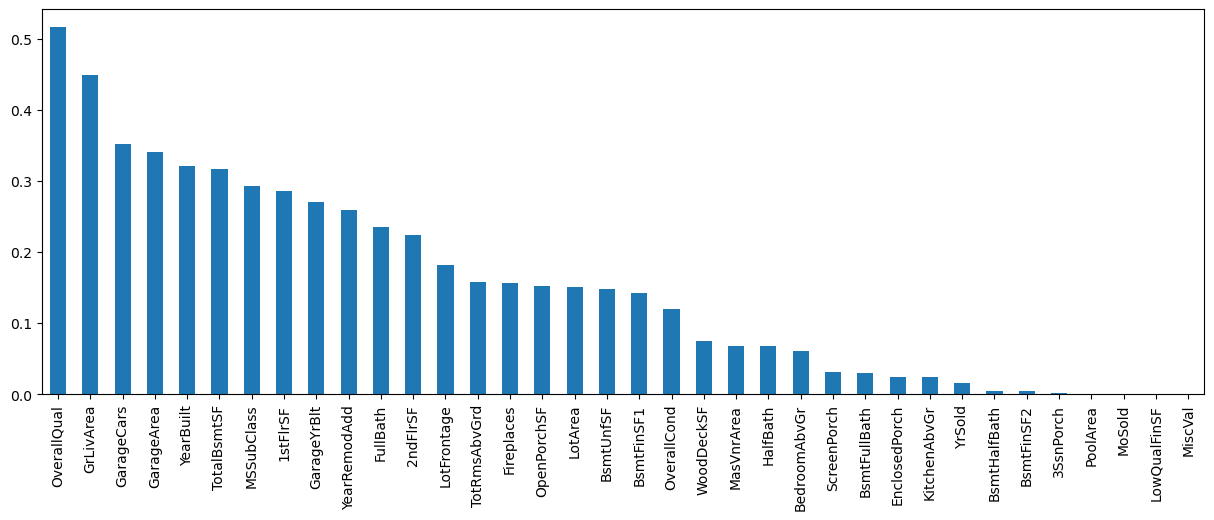

In [63]:
# ploting the mutual_info
plt.figure(figsize=(15, 5))
mutual_info.sort_values(ascending=False).plot(kind='bar')
plt.show()


In [64]:
# Importing the necessary modules for feature selection
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression

# Initializing the feature selector object using mutual_info_regression as the scoring function and setting the percentile to 20
selector = SelectPercentile(mutual_info_regression, percentile=20)

# Fitting the selector object to the training data to identify the top features based on mutual information
# X_train is filled with the mean values to handle missing data
selector.fit(X_train.fillna(X_train.mean()), y_train)

# Retrieving the column names of the selected features identified by the selector object
X_train.columns[selector.get_support()]


Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

Selecting the top `20 percentile` means we want to choose the subset of features that are among the top 20% most informative or relevant for predicting the target variable. It is a way to prioritize the features that have the highest mutual information scores or statistical relevance with the target variable in the context of feature selection.

#### **Difference Between Information Gain And Mutual Information**


$$I(X ; Y) = H(X) - H(X | Y)$$
and
$$IG(S, a) = H(S) - H(S | a)$$

As such, mutual information is sometimes used as a synonym for
information gain. Technically, they calculate the same quantity
if applied to the same data.


Mutual information $(I(X; Y))$ measures the amount of shared information between two variables, `X` and `Y`. It tells us how much knowing the value of one variable reduces uncertainty about the other variable.

Information gain $(IG(S, a))$ is used in machine learning and decision trees to assess the usefulness of a feature (attribute) in predicting a target variable. It quantifies the reduction in uncertainty about the target variable achieved by splitting the data based on a specific feature.

While mutual information and information gain may yield the same result when applied to the same data, they serve different purposes. Mutual information focuses on measuring the dependence between variables, while information gain is used for feature selection in machine learning.

### **Comparion of Univariate And Mutual Information**

Comparison of `F-test` and `Mutual Information`?

The `F-test` and `Mutual Information` are both **statistical measures** used to `analyze relationships between variables`, but they have different applications and interpretations.

- The `F-test` is used to compare the variances between two or more groups or samples. It determines whether the means of these groups are significantly different from each other. The F-test calculates the ratio of the variances between groups and within groups, and based on this ratio, it determines the statistical significance of the differences. The F-test is commonly used in analysis of variance (ANOVA) to test for differences in means across multiple groups.

- On the other hand, `Mutual Information` measures the dependence or information shared between two variables. It quantifies the reduction in uncertainty about one variable when the value of the other variable is known. Mutual Information is often used in feature selection and information theory. It helps identify the relevance or amount of information one variable provides about another.



|     | F-test| Mutual Information |
| --- | --------------------------------------------- | ---------------------------------------------- |
| `Use` | Compares variances between groups              | Measures dependence between variables           |
| `Application` | Testing differences in means across groups   | Feature selection, information theory           |
| `Interpretation` | Determines statistical significance of differences | Quantifies shared information or dependence |
| `Focus` | Group comparisons                              | Information content and relevance between variables |




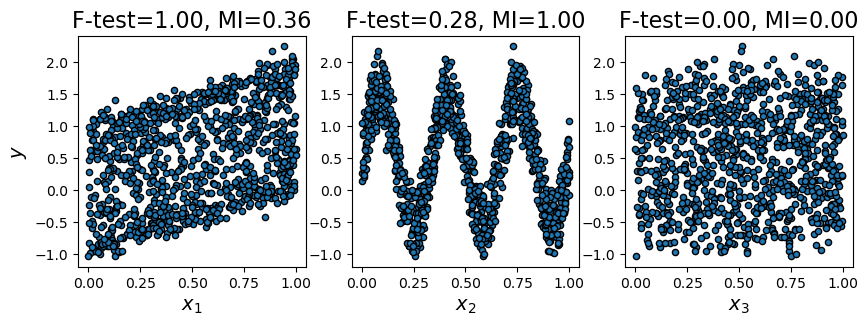

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()